In [1]:
# import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# display matplotlib graph's within notebook
%matplotlib inline 
import numpy as np
import os

np.set_printoptions(precision=3,suppress=True)

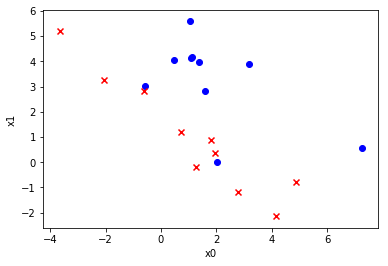

[[ 1.    -0.583  3.031]
 [ 1.     1.074  4.126]
 [ 1.     1.584  2.833]
 [ 1.     3.188  3.909]
 [ 1.     2.02   0.007]]
[1. 1. 1. 1. 1.]


In [2]:
num_iters = 100
alpha = 0.001

# class 0:
# covariance matrix and mean

cov0 = np.array([[5,-3],[-3,3]])

mean0 = np.array([2.,3])

# number of data points
m0 = 10
# generate m0 gaussian distributed data points with
# mean0 and cov0.
r0 = np.random.multivariate_normal(mean0, cov0, m0)

# covariance matrix
cov1 = np.array([[5,-3],[-3,3]])
mean1 = np.array([1.,1])
m1 = 10
r1 = np.random.multivariate_normal(mean1, cov1, m1)

plt.scatter(r0[...,0], r0[...,1], c='b', marker='o', label="Klasse 0")
plt.scatter(r1[...,0], r1[...,1], c='r', marker='x', label="Klasse 1")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

X = np.concatenate((r0,r1))
X = np.append(np.ones((len(X),1)), X, axis=1)
y = np.zeros(len(r0)+len(r1))
y[:len(r0),] = 1
print(X[:5])
print(y[:5])

m = len(y)
theta = np.array([1.1, 2.0, -.9]) 

Text(0,0.5,'$g(x)$')

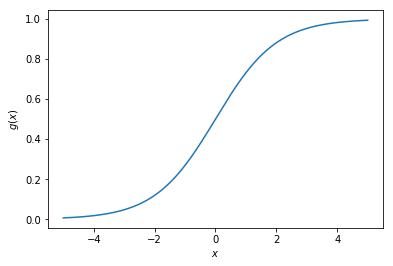

In [3]:
# Aufgabe  1
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# test on a few values
xx = np.linspace(-5, 5, 1000)

# plot sigmoid function vs. x
plt.plot(xx, sigmoid(xx))
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')

In [4]:
# Aufgabe 2
def logistic_hypothesis(theta):
    def h(X):
        y = sigmoid(np.dot(X, theta))
        return y
    return h


# test
theta_test_0 = np.array([1.1, 2.0, -.9]) 
h_test_0 = logistic_hypothesis(theta_test_0)
X_test_0 = X.copy()
print(h_test_0(X_test_0))

[0.058 0.385 0.848 0.981 0.994 1.    0.392 0.162 0.575 0.139 0.811 0.98
 1.    0.    0.979 0.067 1.    0.99  0.003 1.   ]


In [5]:
# Aufgabe 3
def cross_entropy_loss(h, X, y):
    def loss(theta):
        h = logistic_hypothesis(theta)
        temp = np.dot(y, np.log(h(X))) + np.dot((1-y), np.log(1- h(X)))
        return temp
    return loss


# test
theta_test_1 = np.array([1.1, 2.0, -.9]) 
h_test_1 = logistic_hypothesis(theta_test_1)
X_test_1 = X.copy()
y_test_1 = y.copy()

loss_test_1 = cross_entropy_loss(h_test_1, X_test_1, y_test_1)
print(loss_test_1(theta_test_1))

-53.986299866198614


In [6]:
# Aufgabe 4
def cost_function(X, y, h, theta):
    loss = cross_entropy_loss(h, X, y)
    cost = -1*(1/m) * loss(theta)
    return cost


# test
theta_test_2 = np.array([1.1, 2.0, -.9]) 
h_test_2 = logistic_hypothesis(theta_test_2)
X_test_2 = X.copy()
y_test_2 = y.copy()

cost_test_2 = cost_function(X_test_2, y_test_2, h_test_2, theta_test_2)
print(cost_test_2)

2.699314993309931


In [7]:
# Aufgabe 5
# a) 
def compute_new_theta(X, y, theta, alpha, h):
    theta = theta - np.dot(np.transpose(X), h(X) - y)*(alpha/m)
    return theta

# test
theta_test_3 = np.array([1.1, 2.0, -.9]) 
h_test_3 = logistic_hypothesis(theta_test_3)
X_test_3 = X.copy()
y_test_3 = y.copy()

theta_test_3 = compute_new_theta(X_test_3, y_test_3, theta_test_3, alpha, h_test_3)
print(theta_test_3)

[ 1.1    1.999 -0.899]


In [8]:
# b), c)
def gradient_descent(alpha, theta, X, y):
    for i in range(num_iters):
        h = logistic_hypothesis(X)
        theta = compute_new_theta(X, y, theta, alpha, h)
        for j in range(m):
            j = cost_function(X, y)
            J_cost = j(theta)
            J_history[i] = J_cost
    return J_history, theta

# test
theta_test_4 = np.array([0, 0, 0]) 
h_test_4 = logistic_hypothesis(theta_test_4)
X_test_4 = X.copy()
y_test_4 = y.copy()

J_history, theta_result = gradient_descent(alpha, theta_test_4, X_test_4, y_test_4)
plt.plot(J_history)

ValueError: shapes (20,3) and (20,3) not aligned: 3 (dim 1) != 20 (dim 0)